In [521]:
import pandas as pd
import numpy as np
import math
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime, timedelta


In [522]:
df=pd.read_csv('Bitstamp_BTCUSD_1h.csv')

In [523]:
df.head(10)

,unix,date,symbol,open,high,low,close,Volume BTC,Volume USD
0,1641340800,01-05-2022 00:00,BTC/USD,45828.77,46108.23,45714.55,46082.53,13.612277,6.272882e+05
1,1641337200,01-04-2022 23:00,BTC/USD,46139.37,46151.69,45746.88,45820.00,52.215414,2.392510e+06
2,1641333600,01-04-2022 22:00,BTC/USD,46208.74,46241.26,45955.00,46158.54,78.263725,3.612539e+06
3,1641330000,01-04-2022 21:00,BTC/USD,46267.86,46310.13,45998.12,46213.06,57.006819,2.634460e+06
4,1641326400,01-04-2022 20:00,BTC/USD,46022.83,46407.90,45951.84,46266.95,75.669588,3.501001e+06
5,1641322800,01-04-2022 19:00,BTC/USD,45717.81,46446.40,45581.42,46006.67,232.366356,1.069040e+07
6,1641319200,01-04-2022 18:00,BTC/USD,46549.47,46729.21,45539.05,45734.74,200.665193,9.177370e+06
7,1641315600,01-04-2022 17:00,BTC/USD,46747.26,46985.36,46511.42,46549.47,74.412970,3.463884e+06
8,1641312000,01-04-2022 16:00,BTC/USD,46917.25,46917.25,46630.19,46779.78,80.729670,3.776516e+06
9,1641308400,01-04-2022 15:00,BTC/USD,47354.88,47526.00,46794.27,46881.25,192.431795,9.021443e+06


In [524]:
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose

from scipy import stats
import statsmodels.api as sm
from itertools import product

import warnings
warnings.filterwarnings('ignore')

In [525]:
df.head(10)

,unix,date,symbol,open,high,low,close,Volume BTC,Volume USD
0,1641340800,01-05-2022 00:00,BTC/USD,45828.77,46108.23,45714.55,46082.53,13.612277,6.272882e+05
1,1641337200,01-04-2022 23:00,BTC/USD,46139.37,46151.69,45746.88,45820.00,52.215414,2.392510e+06
2,1641333600,01-04-2022 22:00,BTC/USD,46208.74,46241.26,45955.00,46158.54,78.263725,3.612539e+06
3,1641330000,01-04-2022 21:00,BTC/USD,46267.86,46310.13,45998.12,46213.06,57.006819,2.634460e+06
4,1641326400,01-04-2022 20:00,BTC/USD,46022.83,46407.90,45951.84,46266.95,75.669588,3.501001e+06
5,1641322800,01-04-2022 19:00,BTC/USD,45717.81,46446.40,45581.42,46006.67,232.366356,1.069040e+07
6,1641319200,01-04-2022 18:00,BTC/USD,46549.47,46729.21,45539.05,45734.74,200.665193,9.177370e+06
7,1641315600,01-04-2022 17:00,BTC/USD,46747.26,46985.36,46511.42,46549.47,74.412970,3.463884e+06
8,1641312000,01-04-2022 16:00,BTC/USD,46917.25,46917.25,46630.19,46779.78,80.729670,3.776516e+06
9,1641308400,01-04-2022 15:00,BTC/USD,47354.88,47526.00,46794.27,46881.25,192.431795,9.021443e+06


In [526]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31939 entries, 0 to 31938
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   unix        31939 non-null  int64  
 1   date        31939 non-null  object 
 2   symbol      31939 non-null  object 
 3   open        31939 non-null  float64
 4   high        31939 non-null  float64
 5   low         31939 non-null  float64
 6   close       31939 non-null  float64
 7   Volume BTC  31939 non-null  float64
 8   Volume USD  31939 non-null  float64
dtypes: float64(6), int64(1), object(2)
memory usage: 2.2+ MB


In [527]:
df['date']=pd.to_datetime(df['date'])

In [528]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31939 entries, 0 to 31938
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   unix        31939 non-null  int64         
 1   date        31939 non-null  datetime64[ns]
 2   symbol      31939 non-null  object        
 3   open        31939 non-null  float64       
 4   high        31939 non-null  float64       
 5   low         31939 non-null  float64       
 6   close       31939 non-null  float64       
 7   Volume BTC  31939 non-null  float64       
 8   Volume USD  31939 non-null  float64       
dtypes: datetime64[ns](1), float64(6), int64(1), object(1)
memory usage: 2.2+ MB


In [529]:
bitcoin=df[['date','open','high','low','close']]

In [530]:
bitcoin.set_index('date',inplace=True)

In [531]:
bitcoin_M=bitcoin.resample('M').mean()

In [532]:
bitcoin

,open,high,low,close
date,,,,
2022-01-05 00:00:00,45828.77,46108.23,45714.55,46082.53
2022-01-04 23:00:00,46139.37,46151.69,45746.88,45820.00
2022-01-04 22:00:00,46208.74,46241.26,45955.00,46158.54
2022-01-04 21:00:00,46267.86,46310.13,45998.12,46213.06
2022-01-04 20:00:00,46022.83,46407.90,45951.84,46266.95
...,...,...,...,...
2018-05-15 10:00:00,8708.32,8865.00,8695.11,8795.90
2018-05-15 09:00:00,8728.49,8754.40,8701.35,8708.32
2018-05-15 08:00:00,8739.00,8750.27,8660.53,8728.49


# Stationarity check and Seasonal decomposition 


Dickey–Fuller test: p=0.997007


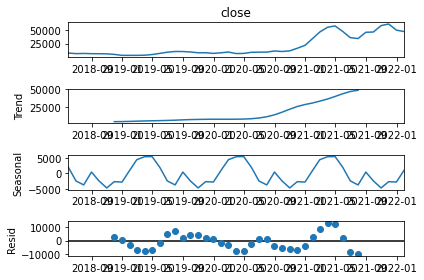

In [533]:
seasonal_decompose(bitcoin_M.close).plot()
plt.figsize=(10,10)
print("Dickey–Fuller test: p=%f" % adfuller(bitcoin_M.close)[1])

plt.show()

# Box-Cox Transformation 


In [534]:
# Box-Cox Transformations
bitcoin_M['close_box'], lmbda = stats.boxcox(bitcoin_M.close)
print("Dickey–Fuller test: p=%f" % adfuller(bitcoin_M.close_box)[1])

Dickey–Fuller test: p=0.901032


#  Differencing 


In [535]:
# Seasonal differentiation (12 months)
bitcoin_M['box_diff_seasonal_12'] = bitcoin_M.close_box - bitcoin_M.close_box.shift(12)
print("Dickey–Fuller test: p=%f" % adfuller(bitcoin_M.box_diff_seasonal_12[12:])[1])

Dickey–Fuller test: p=0.233069


In [536]:
# Seasonal differentiation (3 months)
bitcoin_M['box_diff_seasonal_3'] = bitcoin_M.close_box - bitcoin_M.close_box.shift(3)
print("Dickey–Fuller test: p=%f" % adfuller(bitcoin_M.box_diff_seasonal_3[3:])[1])

Dickey–Fuller test: p=0.000451


Dickey–Fuller test: p=0.017104


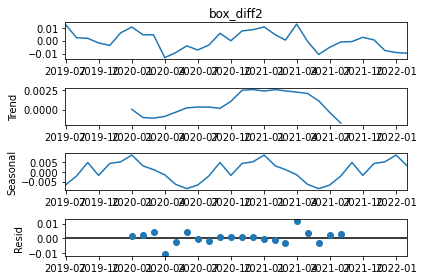

In [537]:
# Regular differentiation
bitcoin_M['box_diff2'] = bitcoin_M.box_diff_seasonal_12 - bitcoin_M.box_diff_seasonal_12.shift(1)

# STL-decomposition
seasonal_decompose(bitcoin_M.box_diff2[13:]).plot()   
print("Dickey–Fuller test: p=%f" % adfuller(bitcoin_M.box_diff2[13:])[1])

plt.show()

### Autocorrelation  


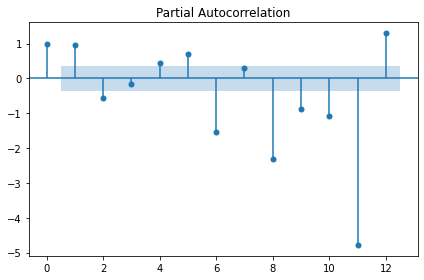

In [571]:
#autocorrelation_plot(btc_month.close)
plot_pacf(bitcoin_M.close[13:].values.squeeze(), lags=12)

plt.tight_layout()
plt.show()

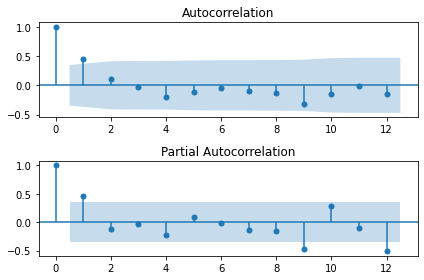

In [539]:
# Initial approximation of parameters using Autocorrelation and Partial Autocorrelation Plots
ax = plt.subplot(211)
# Plot the autocorrelation function
#sm.graphics.tsa.plot_acf(btc_month.box_diff2[13:].values.squeeze(), lags=48, ax=ax)
plot_acf(bitcoin_M.box_diff2[13:].values.squeeze(), lags=12, ax=ax)
ax = plt.subplot(212)
#sm.graphics.tsa.plot_pacf(btc_month.box_diff2[13:].values.squeeze(), lags=48, ax=ax)
plot_pacf(bitcoin_M.box_diff2[13:].values.squeeze(), lags=12, ax=ax)
plt.tight_layout()
plt.show()

## ARIMA Model

#### Parameter Selection

In [549]:
# Initial approximation of parameters
qs = range(0, 3)
ps = range(0, 3)
d=1
parameters = product(ps, qs)
parameters_list = list(parameters)
# len(parameters_list)

# Model Selection
results = []
best_aic = float("inf")
warnings.filterwarnings('ignore')
for param in parameters_list:
    try:
        model = SARIMAX(bitcoin_M.close_box[:-3], order=(param[0], d, param[1])).fit(disp=-1)
    except ValueError:
        print('bad parameter combination:', param)
        continue
    aic = model.aic
    if aic < best_aic:
        best_model = model
        best_aic = aic
        best_param = param
    results.append([param, model.aic])

date
2018-05-31    2.508274
2018-06-30    2.503570
2018-07-31    2.505054
2018-08-31    2.503099
2018-09-30    2.502594
2018-10-31    2.501694
2018-11-30    2.495582
2018-12-31    2.480602
2019-01-31    2.480455
2019-02-28    2.480349
2019-03-31    2.483308
2019-04-30    2.493856
2019-05-31    2.505648
2019-06-30    2.513601
2019-07-31    2.517329
2019-08-31    2.517187
2019-09-30    2.514891
2019-10-31    2.510243
2019-11-30    2.510151
2019-12-31    2.505699
2020-01-31    2.510078
2020-02-29    2.514468
2020-03-31    2.504263
2020-04-30    2.505440
2020-05-31    2.513204
2020-06-30    2.513904
2020-07-31    2.514174
2020-08-31    2.519704
2020-09-30    2.517295
2020-10-31    2.520169
2020-11-30    2.528545
2020-12-31    2.534721
2021-01-31    2.543614
2021-02-28    2.548424
2021-03-31    2.551033
2021-04-30    2.551683
2021-05-31    2.548724
2021-06-30    2.544221
2021-07-31    2.543452
2021-08-31    2.548248
2021-09-30    2.548420
2021-10-31    2.551828
Freq: M, Name: close_box, dty

In [550]:
# Best Models
result_table = pd.DataFrame(results)
result_table.columns = ['parameters', 'aic']
print(result_table.sort_values(by = 'aic', ascending=True).head())

  parameters         aic
1     (0, 1) -316.609357
3     (1, 0) -315.964766
2     (0, 2) -314.613464
4     (1, 1) -314.081251
6     (2, 0) -313.999838


In [551]:
print(best_model.summary())

                               SARIMAX Results                                
Dep. Variable:              close_box   No. Observations:                   42
Model:               SARIMAX(0, 1, 1)   Log Likelihood                 160.305
Date:                Sat, 08 Jan 2022   AIC                           -316.609
Time:                        19:34:14   BIC                           -313.182
Sample:                    05-31-2018   HQIC                          -315.361
                         - 10-31-2021                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.5185      0.135      3.854      0.000       0.255       0.782
sigma2      2.332e-05   6.01e-06      3.877      0.000    1.15e-05    3.51e-05
Ljung-Box (L1) (Q):                   0.05   Jarque-

In [493]:
print("Dickey–Fuller test:: p=%f" % adfuller(best_model.resid[13:])[1])

Dickey–Fuller test:: p=0.000000


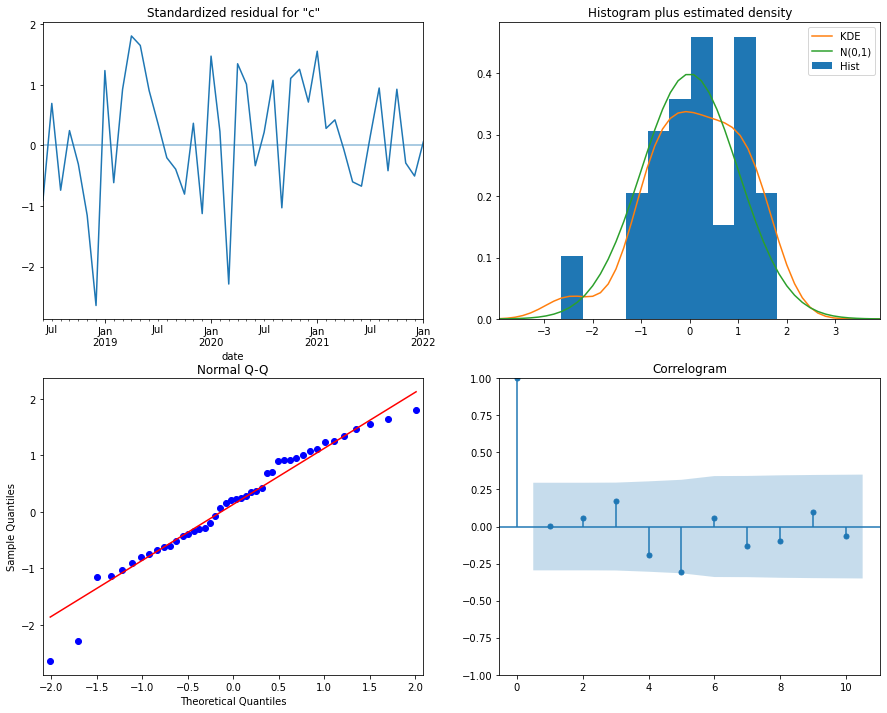

In [494]:
best_model.plot_diagnostics(figsize=(15, 12))
plt.show()

## Prediction  <a name="PredictionARIMA"></a>

In [552]:
# Inverse Box-Cox Transformation Function
def invboxcox(y,lmbda):
   if lmbda == 0:
      return(np.exp(y))
   else:
      return(np.exp(np.log(lmbda*y+1)/lmbda))

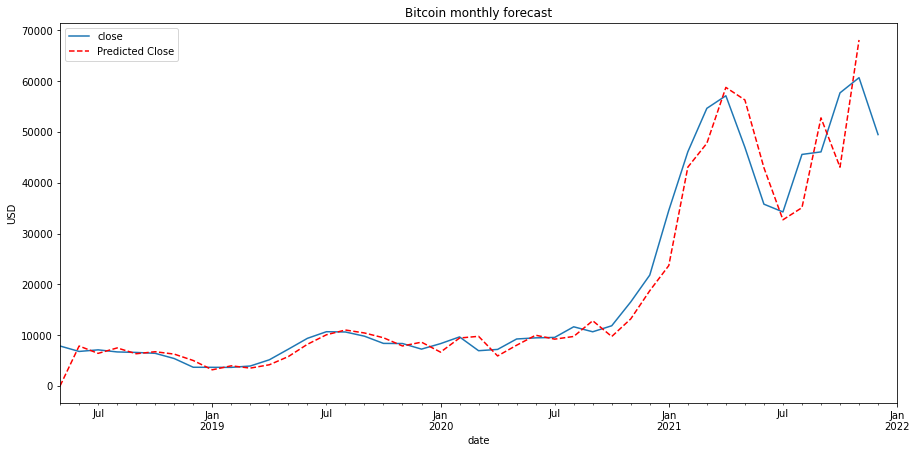

In [567]:
# Prediction
btc_month_pred = bitcoin_M[['close']]
# date_list = [datetime(2018, 3, 31), datetime(2018, 4, 30), datetime(2018, 5, 31), datetime(2018, 6, 30), 
#             datetime(2018, 7, 31), datetime(2018, 8, 31), datetime(2018, 9, 30), datetime(2018, 10, 31),
#             datetime(2018, 11, 30), datetime(2018, 12, 31)]
# date_list = [datetime(2022, 1, 30)]
# future = pd.DataFrame(index=date_list, columns= bitcoin_M.columns)
# btc_month_pred = pd.concat([btc_month_pred, future])

#btc_month_pred['forecast'] = invboxcox(best_model.predict(start=0, end=75), lmbda)
btc_month_pred['forecast'] = invboxcox(best_model.predict(start=datetime(2018, 5, 31), end=datetime(2021, 11, 30)), lmbda)


plt.figure(figsize=(15,7))
btc_month_pred.close[:-1].plot()
btc_month_pred.forecast.plot(color='r', ls='--', label='Predicted Close')
plt.legend()
plt.title('Bitcoin monthly forecast')
plt.ylabel('USD')
plt.show()

In [568]:
btc_month_pred=btc_month_pred[['close','forecast']]

btc_month_pred=btc_month_pred[1:]

In [569]:
temp=btc_month_pred.dropna()
y_forecasted = temp.forecast
y_truth = temp.close

# Compute the root mean square error
rmse = np.sqrt(((y_forecasted - y_truth) ** 2).mean())
print('Mean Squared Error: {}'.format(round(rmse, 2)))

Mean Squared Error: 4376.08


In [570]:
btc_month_pred

,close,forecast
date,,
2018-06-30,6784.713542,7851.445082
2018-07-31,7098.462755,6406.350390
2018-08-31,6689.262984,7476.261314
2018-09-30,6589.007667,6330.912625
2018-10-31,6415.201989,6728.064604
2018-11-30,5388.026611,6261.029250
2018-12-31,3671.080148,5000.969242
2019-01-31,3658.237863,3169.698535
2019-02-28,3648.984539,3953.323313


In [500]:
hourly=bitcoin.resample('H').mean()

In [501]:

# start

In [502]:
def model(data):    
    # Initial approximation of parameters
    qs = range(0, 3)
    ps = range(0, 3)
    d=1
    parameters = product(ps, qs)
    parameters_list = list(parameters)
    len(parameters_list)

    # Model Selection
    results = []
    best_aic = float("inf")
    warnings.filterwarnings('ignore')
    for param in parameters_list:
        try:
            model = SARIMAX(data.close, order=(param[0], d, param[1])).fit(disp=-1)
        except ValueError:
            print('bad parameter combination:', param)
            continue
        aic = model.aic
        if aic < best_aic:
            best_model = model
            best_aic = aic
            best_param = param
        results.append([param, model.aic])
    return best_model

In [503]:
start=datetime(2022,1,5)
delta=timedelta(15.5)
best_model=model(hourly.loc[start-delta:start])

In [504]:
best_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  close   No. Observations:                  373
Model:               SARIMAX(2, 1, 2)   Log Likelihood               -2586.559
Date:                Sat, 08 Jan 2022   AIC                           5183.118
Time:                        18:17:37   BIC                           5202.713
Sample:                    12-20-2021   HQIC                          5190.900
                         - 01-05-2022                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.4646      0.026     56.381      0.000       1.414       1.516
ar.L2         -0.9046      0.029    -30.972      0.000      -0.962      -0.847
ma.L1         -1.5657      0.051    -30.746      0.000      -1.666      -1.466
ma.L2          0.9978      0.063     15.817      0.000       0.874       1.121
sigma2      6.565e+04   5018.750     13.082      0.000    5.58e+04    7.55e+04
===================================================================================
Ljung-Box (L1) (Q):                   1.76   Jarque-Bera (JB):               147.28
Prob(Q):                              0.19   Prob(JB):                         0.00
Heteroskedasticity (H):               1.10   Skew:                             0.21
Prob(H) (two-sided):                  0.58   Kurtosis:                         6.05
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [505]:
best_model.predict(start,start+delta)

2022-01-05 00:00:00    45799.664460
2022-01-05 01:00:00    46120.079441
2022-01-05 02:00:00    46218.968574
2022-01-05 03:00:00    46329.834436
2022-01-05 04:00:00    46402.752959
                           ...     
2022-01-20 08:00:00    46267.626464
2022-01-20 09:00:00    46267.626463
2022-01-20 10:00:00    46267.626462
2022-01-20 11:00:00    46267.626461
2022-01-20 12:00:00    46267.626461
Freq: H, Name: predicted_mean, Length: 373, dtype: float64

In [506]:
temp=pd.concat([hourly.loc[start-delta:start],pd.DataFrame(best_model.predict(start,start+delta))],axis=1)

In [1]:
# plt.figure(figsize=(15,7))
# temp.close.plot()
# temp.predicted_mean.plot(color='r', ls='--', label='Predicted Close')
# plt.legend()
# plt.title('Bitcoin monthly forecast')
# plt.ylabel('USD')
# plt.show()

In [508]:
temp

,open,high,low,close,predicted_mean
2021-12-20 12:00:00,46097.02,46117.76,45666.86,45750.33,NaN
2021-12-20 13:00:00,45753.58,46007.73,45605.03,45721.56,NaN
2021-12-20 14:00:00,45721.56,46333.00,45572.94,46333.00,NaN
2021-12-20 15:00:00,46333.00,46333.00,45915.20,45969.10,NaN
2021-12-20 16:00:00,45990.66,46520.90,45876.70,46411.89,NaN
...,...,...,...,...,...
2022-01-20 08:00:00,NaN,NaN,NaN,NaN,46267.626464
2022-01-20 09:00:00,NaN,NaN,NaN,NaN,46267.626463
2022-01-20 10:00:00,NaN,NaN,NaN,NaN,46267.626462
2022-01-20 11:00:00,NaN,NaN,NaN,NaN,46267.626461


In [511]:
# Best Models
result_table = pd.DataFrame(results)
result_table.columns = ['parameters', 'aic']
print(result_table.sort_values(by = 'aic', ascending=True).head())
print(best_model.summary())

      parameters         aic
7   (0, 1, 0, 1) -297.002958
19  (1, 0, 0, 1) -296.362452
23  (1, 0, 2, 1) -296.060964
10  (0, 1, 2, 0) -295.101960
9   (0, 1, 1, 1) -294.996046
                                     SARIMAX Results                                     
Dep. Variable:                         close_box   No. Observations:                   45
Model:             SARIMAX(0, 1, 1)x(0, 1, 1, 4)   Log Likelihood                 151.501
Date:                           Sat, 08 Jan 2022   AIC                           -297.003
Time:                                   18:18:08   BIC                           -291.936
Sample:                               05-31-2018   HQIC                          -295.171
                                    - 01-31-2022                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
---------------------------

In [512]:
print("Dickey–Fuller test:: p=%f" % adfuller(best_model.resid[13:])[1])

Dickey–Fuller test:: p=0.000000


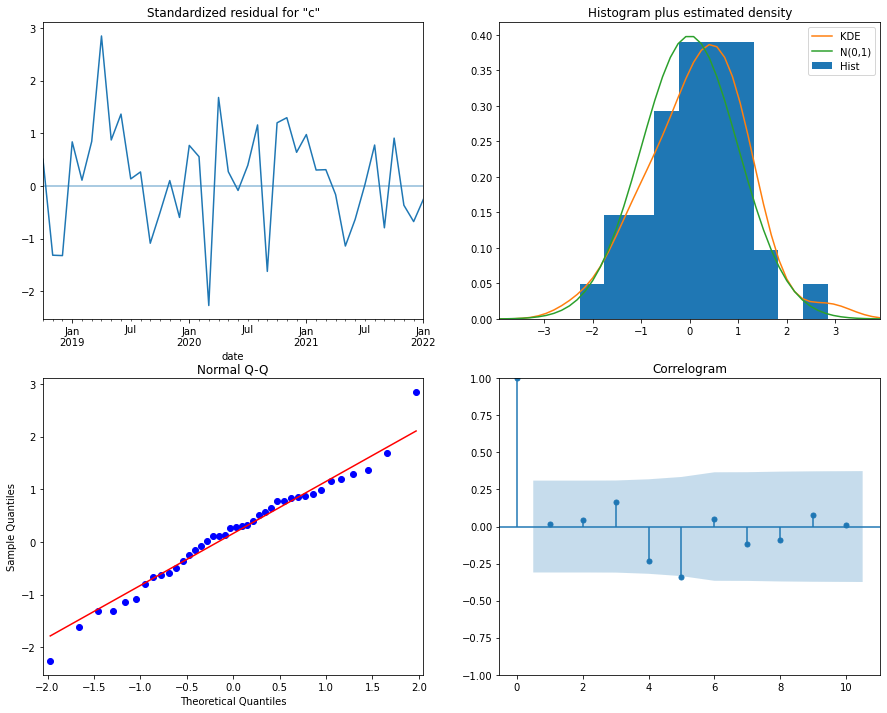

In [513]:
best_model.plot_diagnostics(figsize=(15, 12))
plt.show()

Dickey–Fuller test:: p=0.000000


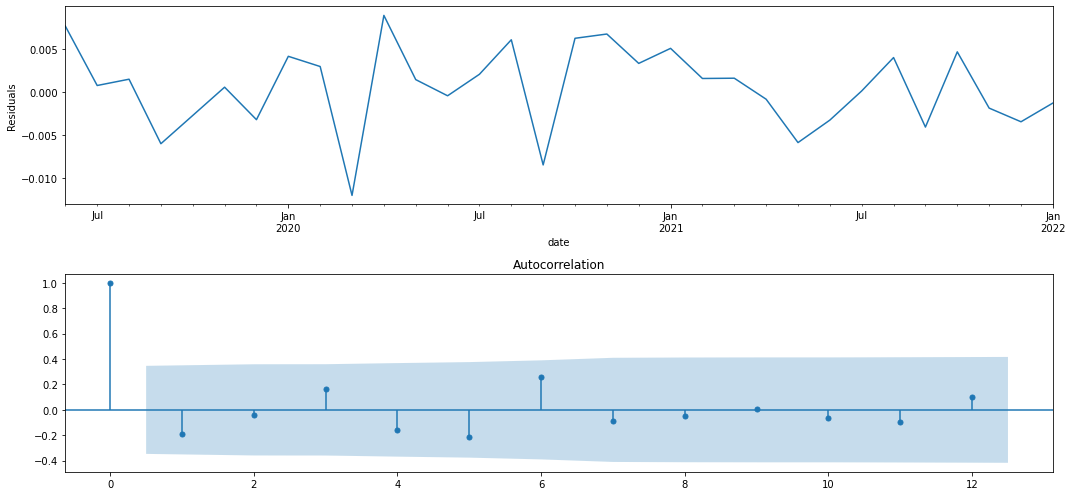

In [514]:
# STL-decomposition
plt.figure(figsize=(15,7))
plt.subplot(211)
best_model.resid[13:].plot()
plt.ylabel(u'Residuals')
ax = plt.subplot(212)
#sm.graphics.tsa.plot_acf(best_model.resid[13:].values.squeeze(), lags=48, ax=ax)
plot_acf(best_model.resid[13:].values.squeeze(), lags=12, ax=ax)

print("Dickey–Fuller test:: p=%f" % adfuller(best_model.resid[13:])[1])

plt.tight_layout()
plt.show()

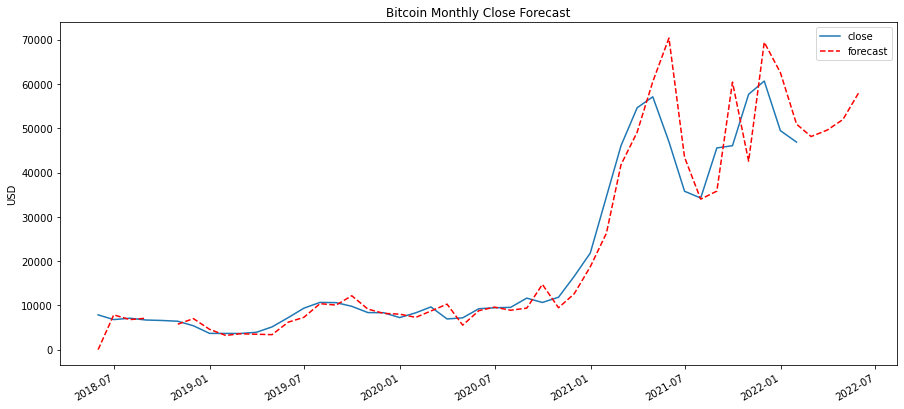

In [515]:
# Prediction

btc_month2= bitcoin_M[['close']]
# date_list = [datetime(2018, 3, 31), datetime(2018, 4, 30), datetime(2018, 5, 31), datetime(2018, 6, 30), 
#             datetime(2018, 7, 31), datetime(2018, 8, 31), datetime(2018, 9, 30), datetime(2018, 10, 31),
#             datetime(2018, 11, 30), datetime(2018, 12, 31)]
date_list = [datetime(2022, 4, 30), datetime(2022, 2, 28), datetime(2022, 5, 31), datetime(2022, 3, 31)]
future = pd.DataFrame(index=date_list, columns= ["close"])
btc_month2= pd.concat([btc_month2, future])
btc_month2
#btc_month_pred['forecast'] = invboxcox(best_model.predict(start=0, end=75), lmbda)
btc_month2['forecast'] = invboxcox(best_model.predict(start=0, end=70), lmbda)



plt.figure(figsize=(15,7))
btc_month2.close.plot()
btc_month2.forecast.plot(color='r', ls='--', label='forecast')
plt.legend()
plt.title('Bitcoin Monthly Close Forecast')
plt.ylabel('USD')
plt.savefig('bitcoin_monthly_forecast.png')
plt.show()

In [516]:
 btc_month2.dropna(inplace=True)
btc_month2=btc_month2[1:]
y_forecasted = btc_month2.forecast
y_truth = btc_month2.close

# Compute the root mean square error
rmse = np.sqrt(((y_forecasted - y_truth) ** 2).mean())
print('Mean Squared Error: {}'.format(round(rmse, 2)))

Mean Squared Error: 6142.36


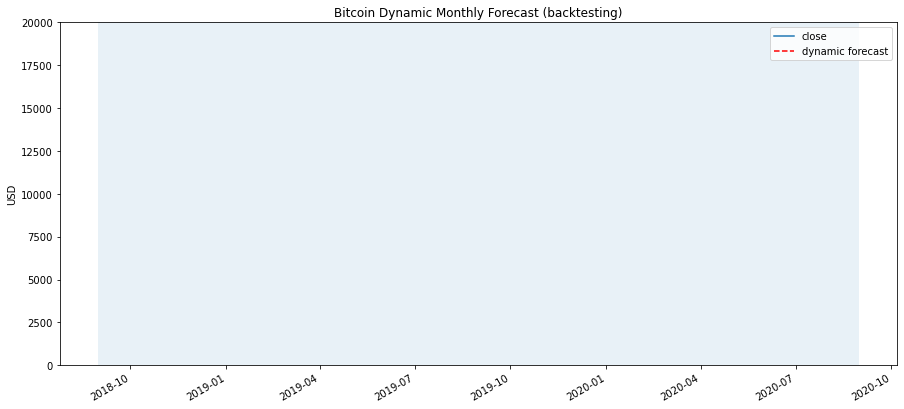

In [517]:
t1 = pd.to_datetime('2018-08-31')
t2 = pd.to_datetime('2020-08-31')
btc_month_dynamic = best_model.get_prediction(start=t1, end=t2, dynamic=True, full_results=True)
btc_month2['dynamic_forecast'] = invboxcox(btc_month_dynamic.predicted_mean, lmbda)

# Taking 80% confidence interval because the 95% blows out too high to visualise
pred_dynamic_ci = btc_month_dynamic.conf_int(alpha=0.2)
pred_dynamic_ci['lower close_box'] = invboxcox(pred_dynamic_ci['lower close_box'], lmbda)
pred_dynamic_ci['upper close_box'] = invboxcox(pred_dynamic_ci['upper close_box'], lmbda)

# Plot
plt.figure(figsize=(15,7))
plt.ylim((0,20000))

btc_month2.close['2016':'2018-01'].plot(label='close')
btc_month2.dynamic_forecast.plot(color='r', ls='--', label='dynamic forecast')

plt.fill_between(pred_dynamic_ci.index,
                pred_dynamic_ci.iloc[:, 0],
                pred_dynamic_ci.iloc[:, 1], color='k', alpha=.25)
plt.fill_betweenx(plt.ylim(), t1, t2, alpha=.1, zorder=-1)

plt.legend()
plt.title('Bitcoin Dynamic Monthly Forecast (backtesting)')
plt.ylabel('USD')
plt.show()

In [518]:
parameters_list

[(0, 0, 0, 0),
 (0, 0, 0, 1),
 (0, 0, 1, 0),
 (0, 0, 1, 1),
 (0, 0, 2, 0),
 (0, 0, 2, 1),
 (0, 1, 0, 0),
 (0, 1, 0, 1),
 (0, 1, 1, 0),
 (0, 1, 1, 1),
 (0, 1, 2, 0),
 (0, 1, 2, 1),
 (0, 2, 0, 0),
 (0, 2, 0, 1),
 (0, 2, 1, 0),
 (0, 2, 1, 1),
 (0, 2, 2, 0),
 (0, 2, 2, 1),
 (1, 0, 0, 0),
 (1, 0, 0, 1),
 (1, 0, 1, 0),
 (1, 0, 1, 1),
 (1, 0, 2, 0),
 (1, 0, 2, 1),
 (1, 1, 0, 0),
 (1, 1, 0, 1),
 (1, 1, 1, 0),
 (1, 1, 1, 1),
 (1, 1, 2, 0),
 (1, 1, 2, 1),
 (1, 2, 0, 0),
 (1, 2, 0, 1),
 (1, 2, 1, 0),
 (1, 2, 1, 1),
 (1, 2, 2, 0),
 (1, 2, 2, 1),
 (2, 0, 0, 0),
 (2, 0, 0, 1),
 (2, 0, 1, 0),
 (2, 0, 1, 1),
 (2, 0, 2, 0),
 (2, 0, 2, 1),
 (2, 1, 0, 0),
 (2, 1, 0, 1),
 (2, 1, 1, 0),
 (2, 1, 1, 1),
 (2, 1, 2, 0),
 (2, 1, 2, 1),
 (2, 2, 0, 0),
 (2, 2, 0, 1),
 (2, 2, 1, 0),
 (2, 2, 1, 1),
 (2, 2, 2, 0),
 (2, 2, 2, 1)]